# Introduction to EM for GMM Continued...

In [26]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import datasets 
%matplotlib inline
from PIL import Image
import imageio
import os

def EM_GaussianMixture(X, NumberOfComponents):
    
    MaximumNumberOfIterations = 100
    DiffThresh = 1e-4
    N = X.shape[0] #number of data points
    d = X.shape[1] #dimensionality
    rp = np.random.permutation(N) #random permutation of numbers 1:N

    #Initialize Parameters
    Means = X[rp[0:NumberOfComponents],:] #Mean: randomly select NumberOfComponents data points as initialized mean values
    Sigs = np.zeros((d,d,NumberOfComponents)) #Deviation: covariance (d*d)* NumberOfComponent
    Ps = np.zeros((NumberOfComponents,)) #P(pie=k)
    pZ_X = np.zeros((N,NumberOfComponents)) #X belong to which NumberOfComponent

    for i in range(NumberOfComponents):
        Sigs[:,:,i] = np.eye(d) #set diagonal covariance as eye
        Ps[i] = 1/NumberOfComponents # set probability of each component/cluster as 1/NumberOfComponent

    #Solve for p(z | x, Theta(t))
    for k in range(NumberOfComponents):
        mvn = stats.multivariate_normal(Means[k,:],Sigs[:,:,k]) #generate multivariate distribution
        pZ_X[:,k] = mvn.pdf(X)*Ps[k] # calculate probability of each data point

    pZ_X = pZ_X / pZ_X.sum(axis=1)[:,np.newaxis]  # np.newaxis fixes cannot broadcast (N,d) (N,) errors

    Diff = np.inf
    NumberIterations = 1
    
    plot_names = []
    while Diff > DiffThresh and NumberIterations <= MaximumNumberOfIterations:
        #Update Means, Sigs, Ps
        MeansOld = Means.copy()
        SigsOld = Sigs.copy()
        PsOld = Ps.copy()
        for k in range(NumberOfComponents):
            #Means
            Means[k,:] = np.sum(X*pZ_X[:,k,np.newaxis],axis=0)/pZ_X[:,k].sum()
            
            #Sigs
            xDiff = X - Means[k,:] 
            J = np.zeros((d,d))
            for i in range(N):
                J = J + pZ_X[i,k]*np.outer(xDiff[i,:],xDiff[i,:]) #forget divide by d
            Sigs[:,:,k] = J / pZ_X[:,k].sum()
            
            #Ps
            Ps[k] = pZ_X[:,k].sum()/N

        #Solve for p(z | x, Theta(t))
        for k in range(NumberOfComponents):
            mvn = stats.multivariate_normal(Means[k,:],Sigs[:,:,k])
            pZ_X[:,k] = mvn.pdf(X)*Ps[k]
        pZ_X = pZ_X / pZ_X.sum(axis=1)[:,np.newaxis]
    
        Diff = abs(MeansOld - Means).sum() + abs(SigsOld - Sigs).sum() + abs(PsOld - Ps).sum();
        
        ##############Code for making plots for gif starts here#########################
        plt.figure(figsize=(6, 6))
        plt.subplot(221)
        plt.scatter(X[:, 0], X[:, 1], c=pZ_X[:,0])
        plt.plot(Means[0,0],Means[0,1],'ro')
        plt.plot(Means[1,0],Means[1,1],'ro')
        plt.plot(Means[2,0],Means[2,1],'ro')

        plt.subplot(222)
        plt.scatter(X[:, 0], X[:, 1], c=pZ_X[:,1])
        plt.plot(Means[0,0],Means[0,1],'ro')
        plt.plot(Means[1,0],Means[1,1],'ro')
        plt.plot(Means[2,0],Means[2,1],'ro')

        plt.subplot(223)
        plt.scatter(X[:, 0], X[:, 1], c=pZ_X[:,2])
        plt.plot(Means[0,0],Means[0,1],'ro')
        plt.plot(Means[1,0],Means[1,1],'ro')
        plt.plot(Means[2,0],Means[2,1],'ro')

        if NumberIterations%5==0 or (NumberIterations<50 and NumberIterations%2==0):
            plot_name = "plot" + str(NumberIterations) +".png"
            plot_names.append(plot_name)
            plt.savefig(plot_name)
        plt.close()
        ##############Code for making plots for gif ends here#########################
        NumberIterations = NumberIterations + 1
    
    ################Start: This code is to make gif with all the plots###############
    with imageio.get_writer('convergence.gif', mode='I') as writer:
        for i,plot in enumerate(plot_names):
            plot_image = imageio.imread(plot)
            for repeater in range(5):
                writer.append_data(plot_image)
        
    for plot in plot_names:
        os.remove(plot)
    ################End: This code is to make gif with all the plots###############
    return Means, Sigs, Ps, pZ_X

Text(0.5, 1.0, 'Blobs with True Labels')

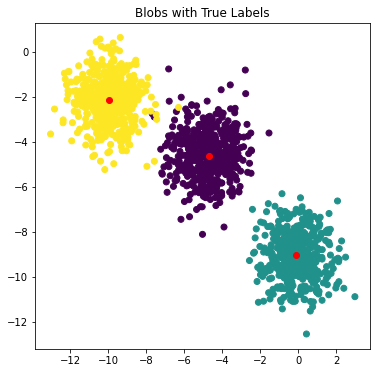

In [27]:
n_samples = 1500
n_clusters = 3

# Make Blob Data
X, y_blobs,centers = datasets.make_blobs(n_samples=n_samples,  return_centers=True)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_blobs)
plt.plot(centers[0,0],centers[0,1],'ro')
plt.plot(centers[1,0],centers[1,1],'ro')
plt.plot(centers[2,0],centers[2,1],'ro')
plt.title("Blobs with True Labels")


The convergence gif will show in the last cell once the code has finished running.


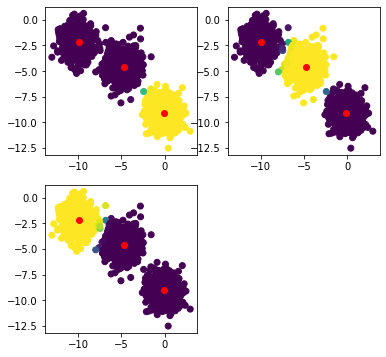

In [29]:
Means, Sigs, Ps, pZ_X = EM_GaussianMixture(X, 3)


plt.figure(figsize=(6, 6))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=pZ_X[:,0])
plt.plot(Means[0,0],Means[0,1],'ro')
plt.plot(Means[1,0],Means[1,1],'ro')
plt.plot(Means[2,0],Means[2,1],'ro')

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=pZ_X[:,1])
plt.plot(Means[0,0],Means[0,1],'ro')
plt.plot(Means[1,0],Means[1,1],'ro')
plt.plot(Means[2,0],Means[2,1],'ro')

plt.subplot(223)
plt.scatter(X[:, 0], X[:, 1], c=pZ_X[:,2])
plt.plot(Means[0,0],Means[0,1],'ro')
plt.plot(Means[1,0],Means[1,1],'ro')
plt.plot(Means[2,0],Means[2,1],'ro')

print("The convergence gif will show in the last cell once the code has finished running.")

![convergence](convergence.gif "convergence")